In [242]:
import pandas as pd 
import numpy as np 

In [243]:
df = pd.read_csv('/home/timur/work_hub/ml_zoomcamp2023/2. Machine Learning for Regression/data.csv')

In [244]:
df.head()

Make       Model  Year             Engine Fuel Type  Engine HP  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   Engine Cylinders Transmission Type     Driven_Wheels  Number of Doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         Market Category Vehicle Size Vehicle Style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway MPG  city mpg  Popularity   MSRP  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

# 2.1 Data preparation


Look at missing values

In [245]:
df.isna().sum()

Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3742
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

In [246]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

We see that our columns have different upper and lower cases, and sometimes spaces. We have to standartize our columns, create lower cases and underscores instead of spaces

In [247]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  BMW  1 Series M  2011  premium unleaded (required)      335.0   
1  BMW    1 Series  2011  premium unleaded (required)      300.0   
2  BMW    1 Series  2011  premium unleaded (required)      300.0   
3  BMW    1 Series  2011  premium unleaded (required)      230.0   
4  BMW    1 Series  2011  premium unleaded (required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            MANUAL  rear wheel drive              2.0   
1               6.0            MANUAL  rear wheel drive              2.0   
2               6.0            MANUAL  rear wheel drive              2.0   
3               6.0            MANUAL  rear wheel drive              2.0   
4               6.0            MANUAL  rear wheel drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  Factory Tuner,Luxury,High-Performance      Compact         Coupe   
1                     Luxury,Performance      Compact   Convertible   
2                Luxury,High-Performance      Compact         Coupe   
3                     Luxury,Performance      Compact         Coupe   
4                                 Luxury      Compact   Convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

Let's standartize out values as well. We can do it only with object dtypes

In [248]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [249]:
df.dtypes[df.dtypes == object]

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

#### Let's create list of names our columns. Then itterate in this list with cycle for standartize records in columns

In [250]:
strings = list(df.dtypes[df.dtypes == object].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [251]:
for col in strings: 
    df[col] = df[col].str.lower().str.replace(' ','_')

Now we can see that our data a bit cleaner

In [252]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

# 2.2 Exploratory data analysis 

In [253]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

#### Let's look closer to our data, check some statistic

In [254]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [255]:
df.columns

Index(['make', 'model', 'year', 'engine_fuel_type', 'engine_hp',
       'engine_cylinders', 'transmission_type', 'driven_wheels',
       'number_of_doors', 'market_category', 'vehicle_size', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'popularity', 'msrp'],
      dtype='object')

In [256]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

Distribution price (MSPR column)

In [257]:
import matplotlib.pyplot as pls 
import seaborn as sns 

%matplotlib inline

<Axes: xlabel='msrp', ylabel='Count'>

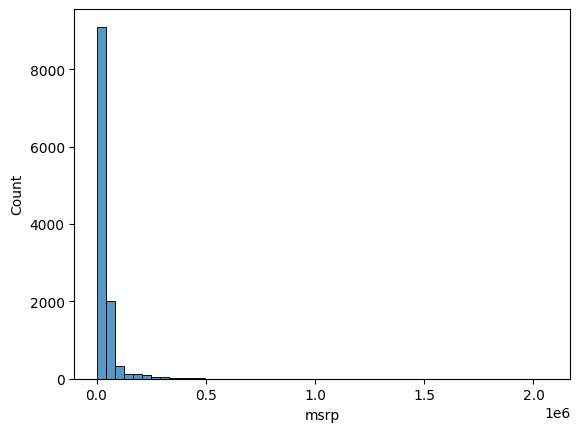

In [258]:
sns.histplot(df.msrp, bins = 50)

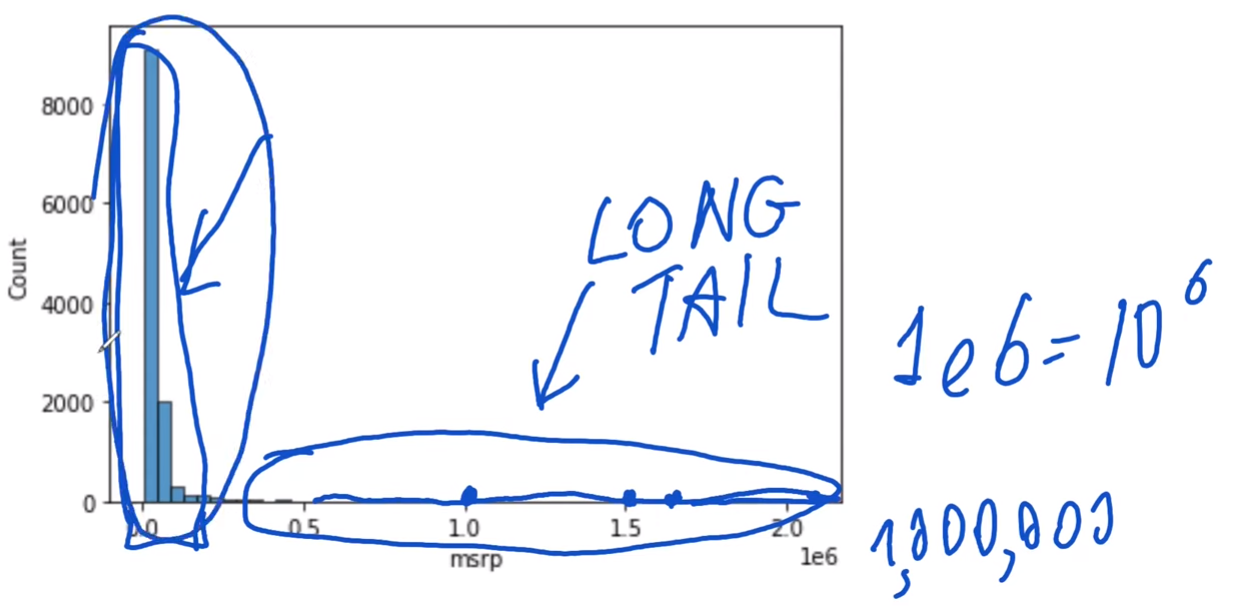

#### Zoom in

<Axes: xlabel='msrp', ylabel='Count'>

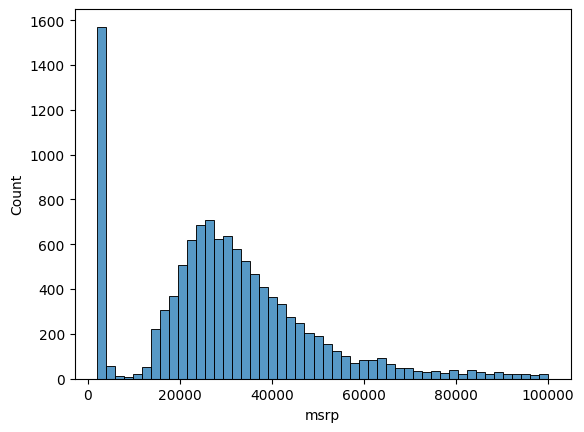

In [259]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)

This kind of distribution not good for ML.So because of that we have to log our distribution. This makes the distribution closer to normal and improves the performance of models that are sensitive to the scale of the data.

We also can use best practice and add 1 to our values to make sure that we don't have 0 values. The problems is that log(0) doesn't exist we will get a error in this situation. We can do it by using -  **np.log1**

In [260]:
price_logs = np.log1p(df.msrp)
price_logs

0        10.739349
1        10.612779
2        10.500977
3        10.290483
4        10.448744
           ...    
11909    10.739024
11910    10.945018
11911    10.832122
11912    10.838031
11913    10.274913
Name: msrp, Length: 11914, dtype: float64

#### Let's see on our new log distribution

<Axes: xlabel='msrp', ylabel='Count'>

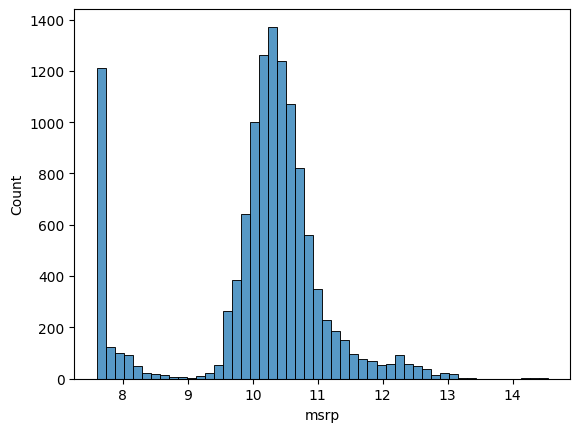

In [261]:
sns.histplot(price_logs, bins = 50)

We see that our tail has gone and also our distribution resemble us **normal distribution**. So we can work with this type of distribution and apply our model

## 2.3 Setting up the validation framework

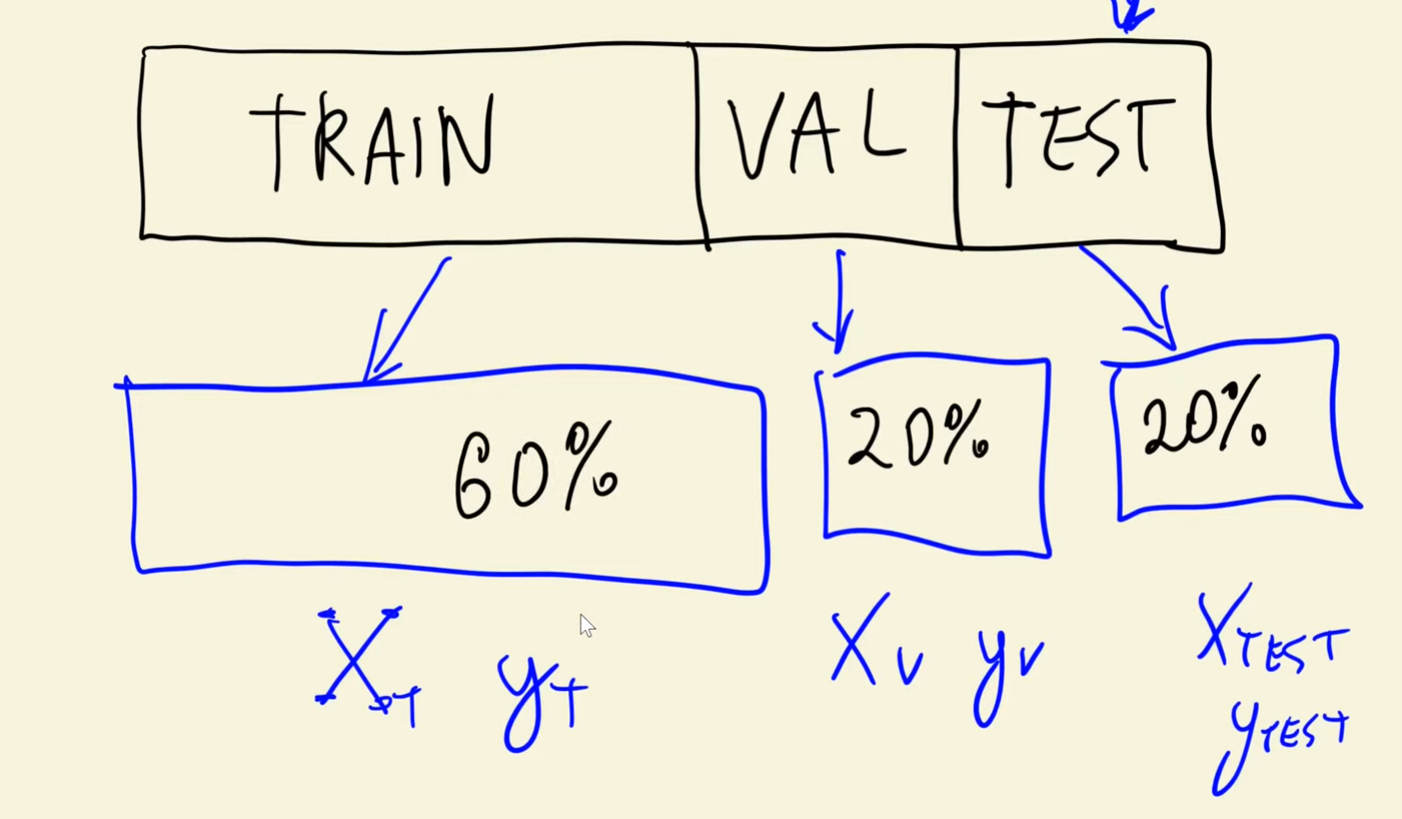

#### Implementing this structure above. First of all set the length of ours train, validation and test datasets

In [262]:
n = len(df)

n_val = int(n * 0.2) 
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(n, n_val+n_test+n_train)

11914 11914


In [263]:
n_val, n_test, n_train

(2382, 2382, 7150)

#### Let's split our dataframe using **iloc** method. As a result we get 3 new datasets:

In [264]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val + n_test]
df_train = df.iloc[n_val + n_test:]

In [265]:
df_val.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [266]:
df_train.head()

make model  year                engine_fuel_type  engine_hp  \
4764  ford  flex  2016                regular_unleaded      287.0   
4765  ford  flex  2017  premium_unleaded_(recommended)      365.0   
4766  ford  flex  2017                regular_unleaded      287.0   
4767  ford  flex  2017                regular_unleaded      287.0   
4768  ford  flex  2017                regular_unleaded      287.0   

      engine_cylinders transmission_type      driven_wheels  number_of_doors  \
4764               6.0         automatic  front_wheel_drive              4.0   
4765               6.0         automatic    all_wheel_drive              4.0   
4766               6.0         automatic    all_wheel_drive              4.0   
4767               6.0         automatic  front_wheel_drive              4.0   
4768               6.0         automatic  front_wheel_drive              4.0   

            market_category vehicle_size vehicle_style  highway_mpg  city_mpg  \
4764  crossover,performance        large         wagon           23        16   
4765              crossover        large         wagon           21        15   
4766  crossover,performance        large         wagon           22        16   
4767  crossover,performance        large         wagon           23        16   
4768  crossover,performance        large         wagon           23        16   

      popularity   msrp  
4764        5657  37800  
4765        5657  43030  
4766        5657  40180  
4767        5657  32730  
4768        5657  38230

#### At first glance it seems like OK, task has done, we successfully split our dataset. But here's the problem. Our data quite ordered so there are some records (for example about BMW model in df_val) that doesn't appear in df_train. That's the problem because our model will be train on data that doesn't exist in validata dataset.

**So we need to shuffle our data**

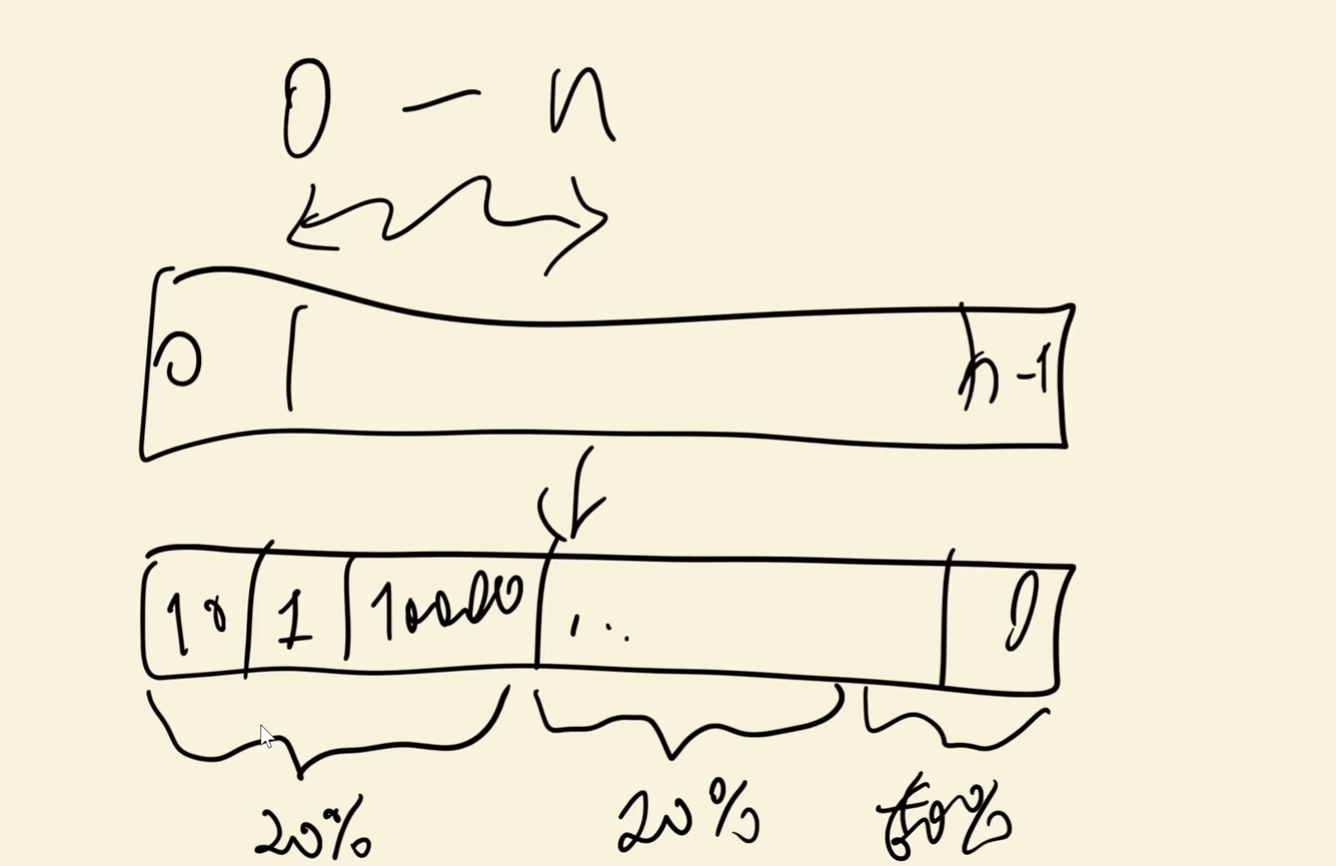

In [267]:
df_train = df.iloc[:n_train]
df_val = df.iloc[n_train:n_train + n_val]
df_test = df.iloc[n_train + n_val:]

#### Lets create an array with the length equal the lenght of our dataset - df.

In [268]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 11911, 11912, 11913])

#### Let's shuffle it

In [269]:
np.random.seed(5)
np.random.shuffle(idx)

In [270]:
idx

array([3863, 7113,  917, ..., 4079, 2254, 2915])

#### Apply it to our datasets

In [271]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [272]:
len(df_train), len(df_val), len(df_test)

(7150, 2382, 2382)

In [273]:
df_train.head()

make          model  year                engine_fuel_type  engine_hp  \
3863  hyundai        elantra  2016                regular_unleaded      173.0   
7113    mazda     mx-5_miata  2015  premium_unleaded_(recommended)      167.0   
917      audi             90  1995                regular_unleaded      172.0   
3833  hyundai  elantra_coupe  2013                regular_unleaded      145.0   
1312   suzuki          aerio  2005                regular_unleaded      155.0   

      engine_cylinders transmission_type      driven_wheels  number_of_doors  \
3863               4.0         automatic  front_wheel_drive              4.0   
7113               4.0            manual   rear_wheel_drive              2.0   
917                6.0            manual    all_wheel_drive              4.0   
3833               4.0         automatic  front_wheel_drive              2.0   
1312               4.0         automatic  front_wheel_drive              4.0   

     market_category vehicle_size vehicle_style  highway_mpg  city_mpg  \
3863     performance      compact         sedan           35        24   
7113     performance      compact   convertible           28        22   
917           luxury      compact         sedan           23        17   
3833             NaN      compact         coupe           37        27   
1312             NaN      compact         sedan           28        22   

      popularity   msrp  
3863        1439  21250  
7113         586  23970  
917         3105   2000  
3833        1439  20895  
1312         481  14349

####  Set indexes and reassign our datasets

In [274]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [275]:
df_train.head()

make          model  year                engine_fuel_type  engine_hp  \
0  hyundai        elantra  2016                regular_unleaded      173.0   
1    mazda     mx-5_miata  2015  premium_unleaded_(recommended)      167.0   
2     audi             90  1995                regular_unleaded      172.0   
3  hyundai  elantra_coupe  2013                regular_unleaded      145.0   
4   suzuki          aerio  2005                regular_unleaded      155.0   

   engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0               4.0         automatic  front_wheel_drive              4.0   
1               4.0            manual   rear_wheel_drive              2.0   
2               6.0            manual    all_wheel_drive              4.0   
3               4.0         automatic  front_wheel_drive              2.0   
4               4.0         automatic  front_wheel_drive              4.0   

  market_category vehicle_size vehicle_style  highway_mpg  city_mpg  \
0     performance      compact         sedan           35        24   
1     performance      compact   convertible           28        22   
2          luxury      compact         sedan           23        17   
3             NaN      compact         coupe           37        27   
4             NaN      compact         sedan           28        22   

   popularity   msrp  
0        1439  21250  
1         586  23970  
2        3105   2000  
3        1439  20895  
4         481  14349

#### Then we need to do something with our **y** (target - price). Actually like I said early we can use log transformation. And then get NumPy instead of Series datatypes.

In [276]:
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

#### We assign our log transform msrp column value to y_train, y_val, y_test. So we have to delete msrp column from df_train, df_val, df_test because we can accidentally use it in future

In [277]:
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

In [278]:
len(y_train)

7150

## 2.4 Linear regression

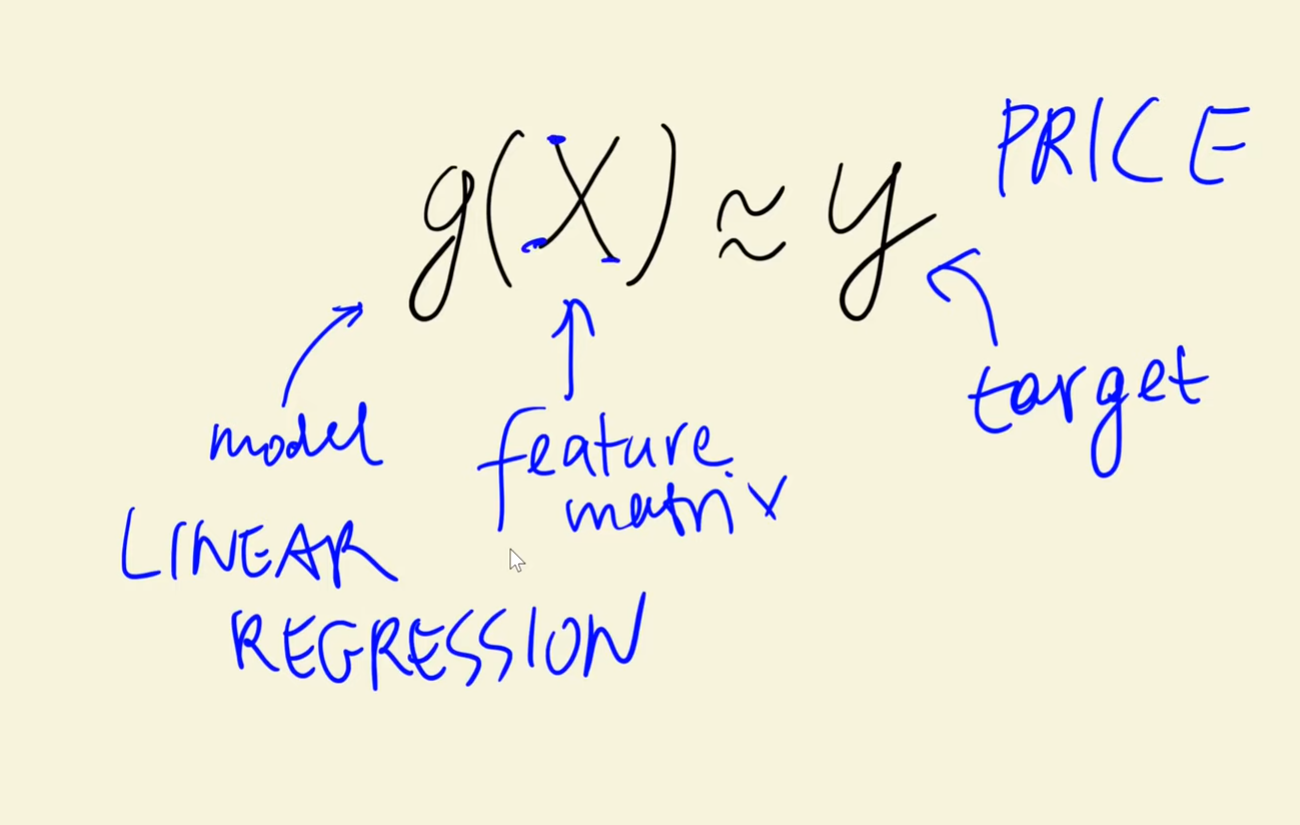

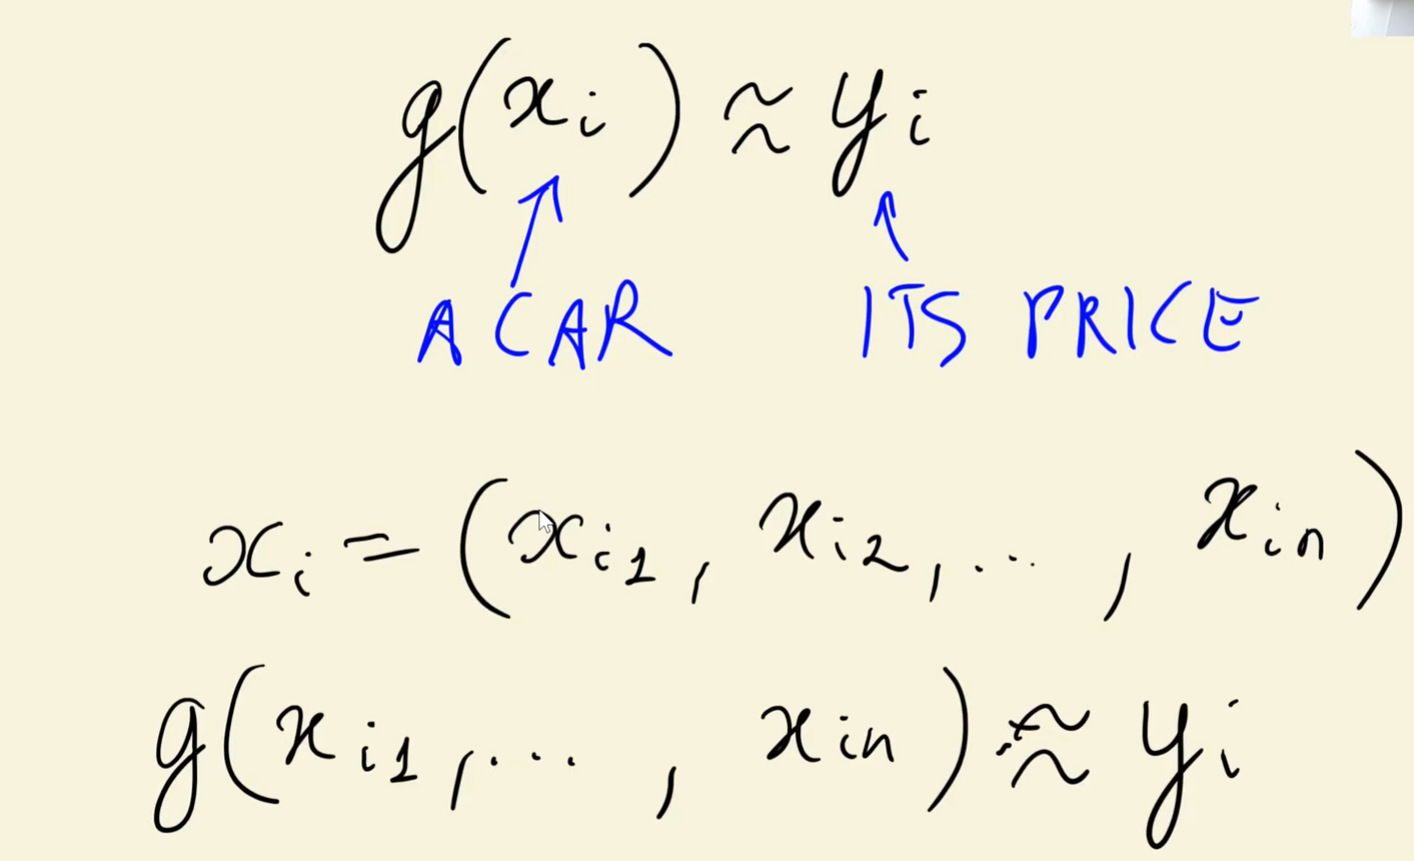

In [279]:
df_train.head()

make          model  year                engine_fuel_type  engine_hp  \
0  hyundai        elantra  2016                regular_unleaded      173.0   
1    mazda     mx-5_miata  2015  premium_unleaded_(recommended)      167.0   
2     audi             90  1995                regular_unleaded      172.0   
3  hyundai  elantra_coupe  2013                regular_unleaded      145.0   
4   suzuki          aerio  2005                regular_unleaded      155.0   

   engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0               4.0         automatic  front_wheel_drive              4.0   
1               4.0            manual   rear_wheel_drive              2.0   
2               6.0            manual    all_wheel_drive              4.0   
3               4.0         automatic  front_wheel_drive              2.0   
4               4.0         automatic  front_wheel_drive              4.0   

  market_category vehicle_size vehicle_style  highway_mpg  city_mpg  \
0     performance      compact         sedan           35        24   
1     performance      compact   convertible           28        22   
2          luxury      compact         sedan           23        17   
3             NaN      compact         coupe           37        27   
4             NaN      compact         sedan           28        22   

   popularity  
0        1439  
1         586  
2        3105  
3        1439  
4         481

Take a look at 10 records in df_train dataser. For example we see record about **chevrolet avalance**. We also see that this model has some chararcteristics like **engine_hp, number_of_doors, city_mpg, etc.**. The idea is that we use all of this characteristics as a **features** and fit our model (in this section it's linear regression) on this **features**.

In [280]:
df_train.iloc[10]

make                                chevrolet
model                               avalanche
year                                     2012
engine_fuel_type     flex-fuel_(unleaded/e85)
engine_hp                               320.0
engine_cylinders                          8.0
transmission_type                   automatic
driven_wheels                rear_wheel_drive
number_of_doors                           4.0
market_category           crossover,flex_fuel
vehicle_size                            large
vehicle_style                 crew_cab_pickup
highway_mpg                                21
city_mpg                                   15
popularity                               1385
Name: 10, dtype: object

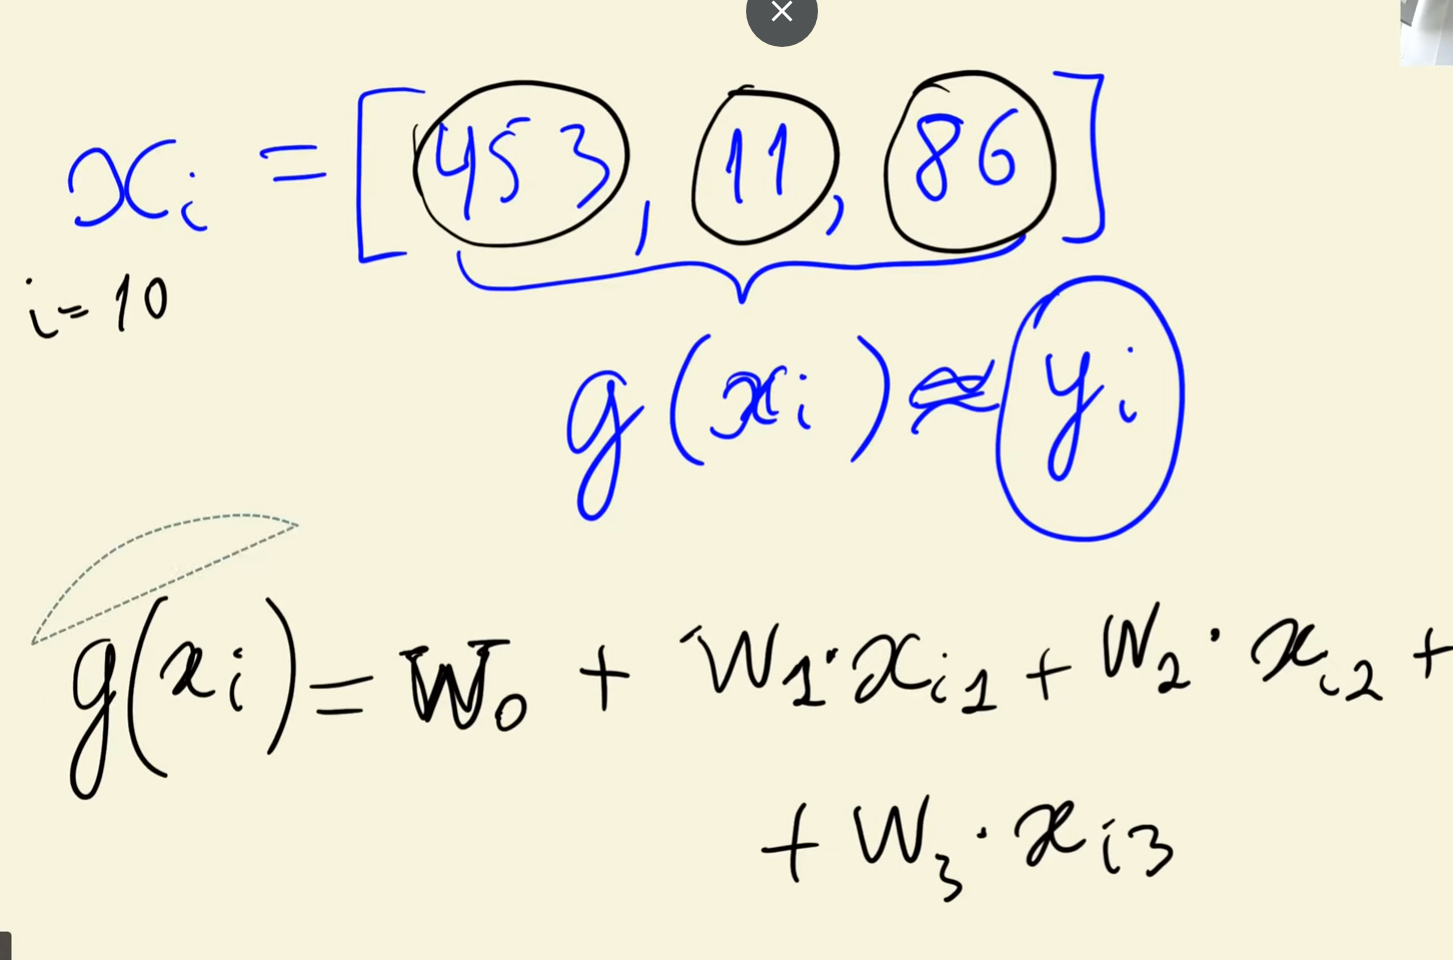

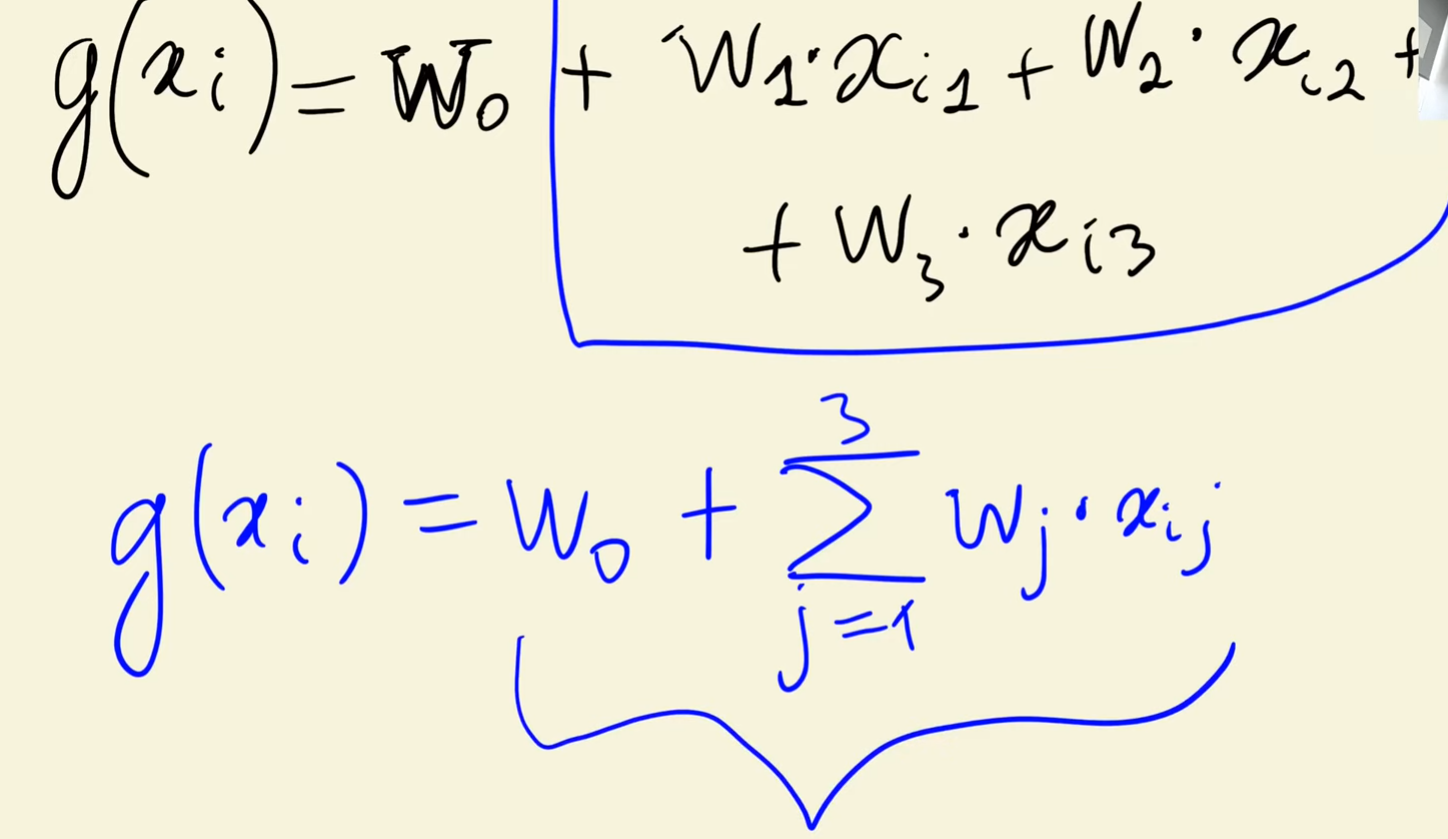

## 2.5 Linear regression vector form Implementation

#### Our weight(created randomly for this example)

In [282]:
w0 = 7.17
w = [0.01, 0.04, 0.002]
w_new = [w0] + w 

#### Our features (created randomly for this example)

In [283]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x3 = [1, 453, 11, 86] 

In [284]:
X = [x1, x2, x3]
X

[[1, 148, 24, 1385], [1, 132, 25, 2031], [1, 453, 11, 86]]

#### Creating feature matrix

In [285]:
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

#### Linear regression model

In [286]:
def linear_regression(X):
    return X.dot(w_new)

#### Prediction

In [287]:
linear_regression(X)

array([12.38 , 13.552, 12.312])

## 2.6 Training a linear regression model

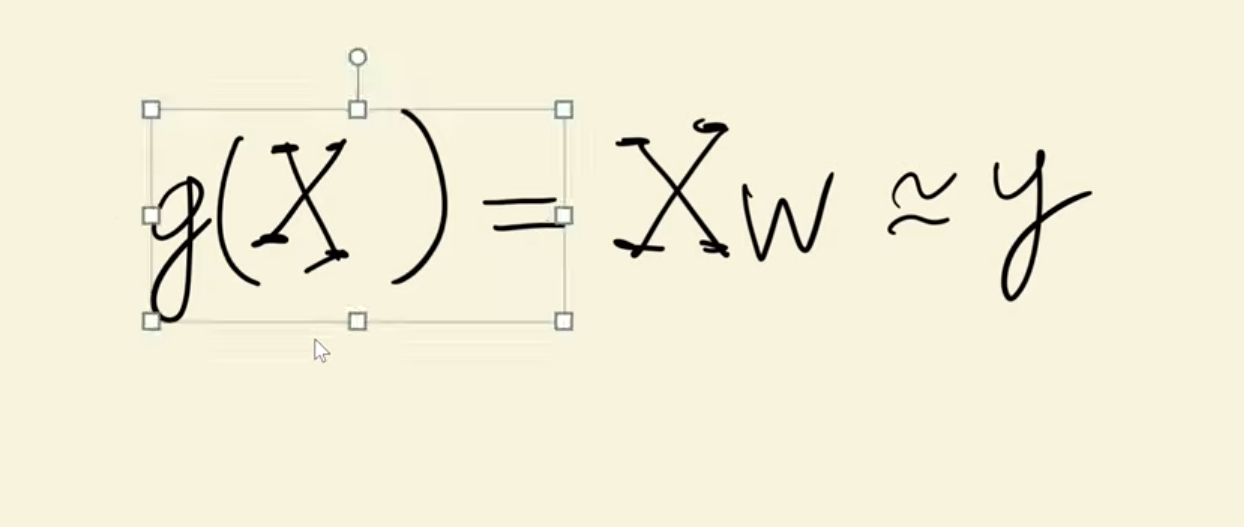

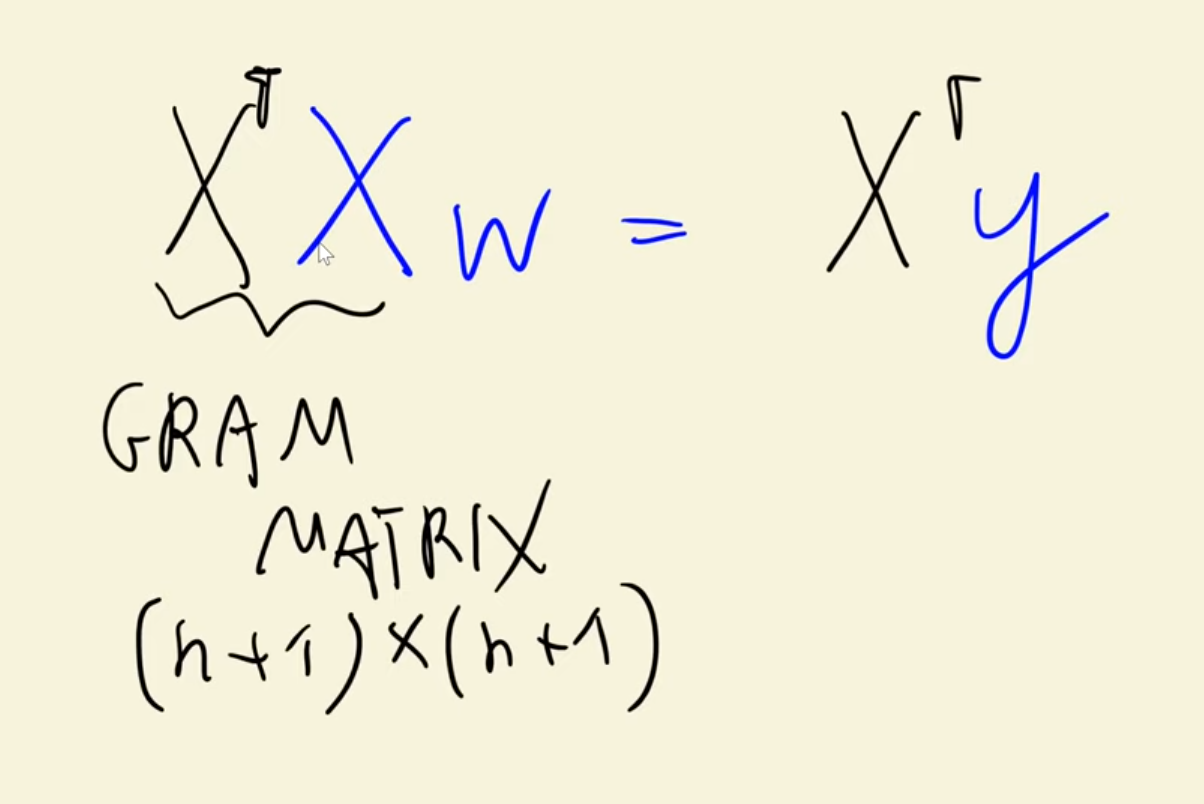

  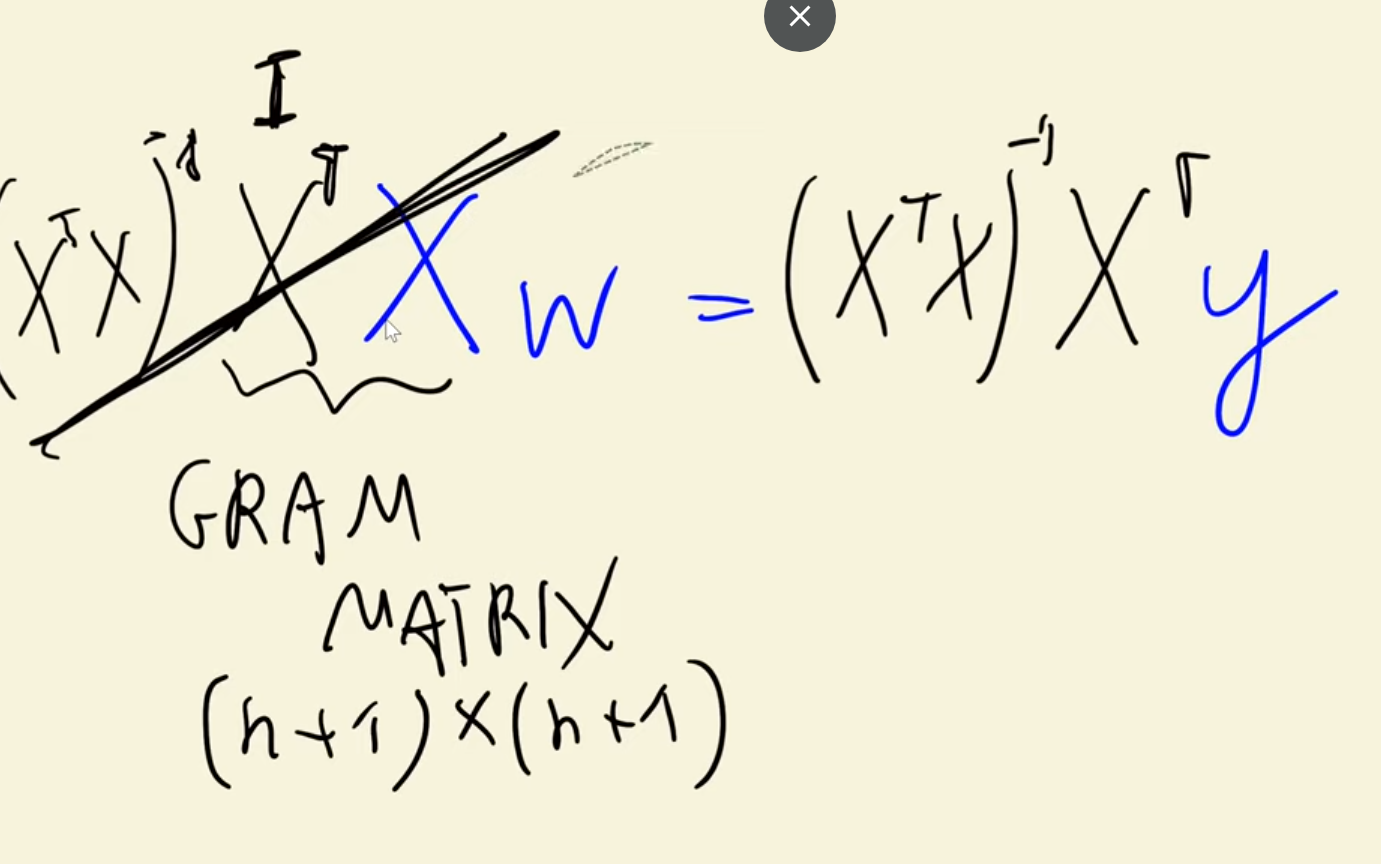

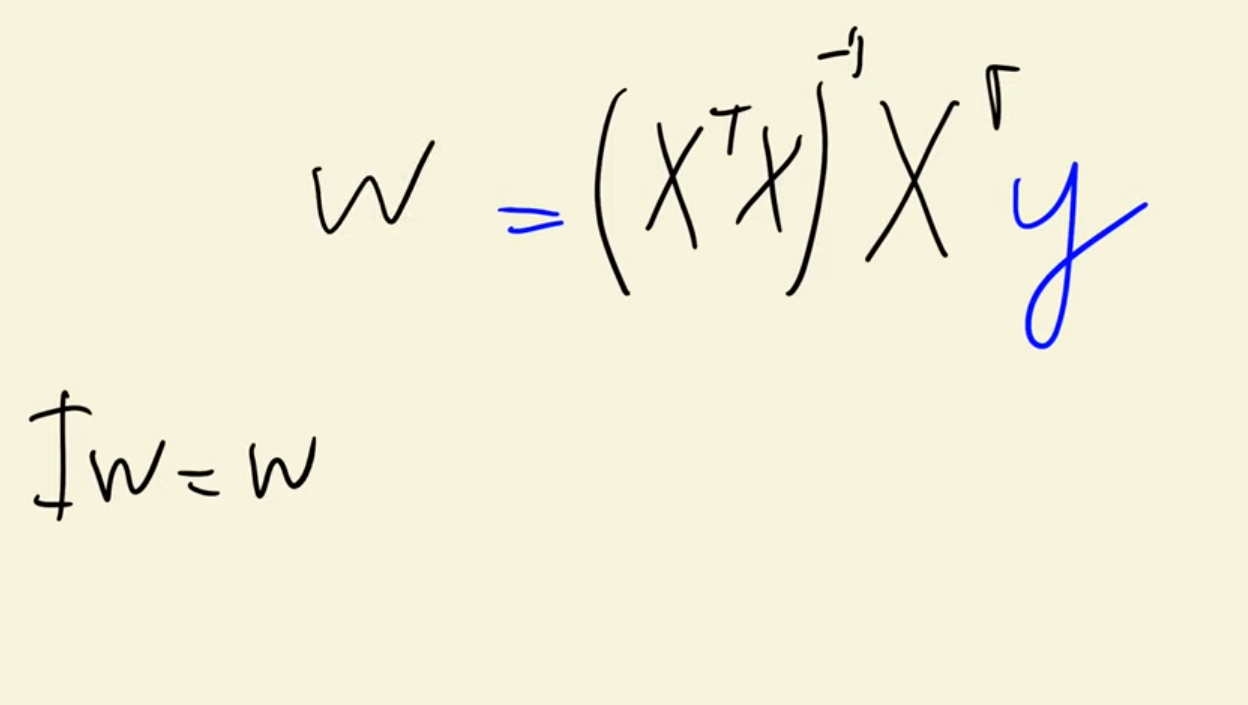

In [288]:
def train_linear_regression(X, y):
    pass

In [289]:
X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

#### Creating a new matrix, because our previous X matrix not square matrix and this is a problem

In [290]:
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86], 
    [38, 54, 185],
    [142, 25, 431],
    [453, 31, 86] 
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [291]:
ones = np.ones(X.shape[0])
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [292]:
X = np.column_stack([ones, X])

#### We have to implement this formula further

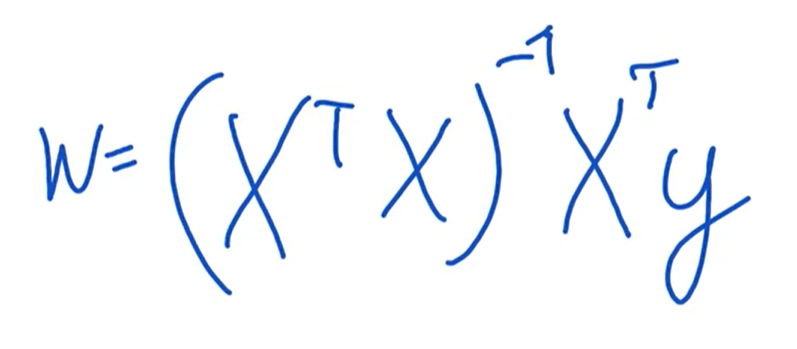

In [293]:
y = [100, 200, 150, 250, 100, 200, 150, 250, 120]

#### Gram Matrix

In [294]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 2.109000e+03, 2.300000e+02, 4.676000e+03],
       [2.109000e+03, 6.964710e+05, 4.411500e+04, 7.185400e+05],
       [2.300000e+02, 4.411500e+04, 7.146000e+03, 1.188030e+05],
       [4.676000e+03, 7.185400e+05, 1.188030e+05, 6.359986e+06]])

#### Inverse this Matrix

In [295]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 3.30686958e+00, -5.39612291e-03, -6.21325581e-02,
        -6.61016816e-04],
       [-5.39612291e-03,  1.11633857e-05,  8.66973393e-05,
         1.08664195e-06],
       [-6.21325581e-02,  8.66973393e-05,  1.46189255e-03,
         8.57849603e-06],
       [-6.61016816e-04,  1.08664195e-06,  8.57849603e-06,
         3.60215866e-07]])

#### Check that we did it correctly. Multiply inverse and XTX MATRIX

In [296]:
XTX.dot(XTX_inv).round(1)

array([[ 1., -0.,  0.,  0.],
       [-0.,  1.,  0.,  0.],
       [-0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  1.]])

Find a **w0 and w** value:

In [297]:
w_full = XTX_inv.dot(X.T).dot(y)

In [298]:
w_full

array([ 3.00067767e+02, -2.27742529e-01, -2.57694130e+00, -2.30120640e-02])

In [299]:
w0 = w_full[0]
w = w_full[1:]

In [300]:
w0, w

(300.0677669255554, array([-0.22774253, -2.5769413 , -0.02301206]))

#### How linear regression model training works

In [301]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]
    

In [302]:
train_linear_regression(X, y)

LinAlgError: Singular matrix

## 2.7 Car price baseline model

In [303]:
df_train.head()

make          model  year                engine_fuel_type  engine_hp  \
0  hyundai        elantra  2016                regular_unleaded      173.0   
1    mazda     mx-5_miata  2015  premium_unleaded_(recommended)      167.0   
2     audi             90  1995                regular_unleaded      172.0   
3  hyundai  elantra_coupe  2013                regular_unleaded      145.0   
4   suzuki          aerio  2005                regular_unleaded      155.0   

   engine_cylinders transmission_type      driven_wheels  number_of_doors  \
0               4.0         automatic  front_wheel_drive              4.0   
1               4.0            manual   rear_wheel_drive              2.0   
2               6.0            manual    all_wheel_drive              4.0   
3               4.0         automatic  front_wheel_drive              2.0   
4               4.0         automatic  front_wheel_drive              4.0   

  market_category vehicle_size vehicle_style  highway_mpg  city_mpg  \
0     performance      compact         sedan           35        24   
1     performance      compact   convertible           28        22   
2          luxury      compact         sedan           23        17   
3             NaN      compact         coupe           37        27   
4             NaN      compact         sedan           28        22   

   popularity  
0        1439  
1         586  
2        3105  
3        1439  
4         481

In [304]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

#### Create a list of feature names. There're five of them

In [305]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

#### Create subset of our df_train based on our base features

In [306]:
df_train[base]

engine_hp  engine_cylinders  highway_mpg  city_mpg  popularity
0         173.0               4.0           35        24        1439
1         167.0               4.0           28        22         586
2         172.0               6.0           23        17        3105
3         145.0               4.0           37        27        1439
4         155.0               4.0           28        22         481
...         ...               ...          ...       ...         ...
7145      330.0               6.0           24        17         190
7146      205.0               4.0           29        21         640
7147      321.0               6.0           28        18        1624
7148      210.0               4.0           33        22         873
7149      250.0               6.0           21        15        2202

[7150 rows x 5 columns]

#### Extract values

In [307]:
X_train = df_train[base].values
X_train

array([[ 173.,    4.,   35.,   24., 1439.],
       [ 167.,    4.,   28.,   22.,  586.],
       [ 172.,    6.,   23.,   17., 3105.],
       ...,
       [ 321.,    6.,   28.,   18., 1624.],
       [ 210.,    4.,   33.,   22.,  873.],
       [ 250.,    6.,   21.,   15., 2202.]])

#### And we have y_train already

In [308]:
y_train

array([ 9.96415923, 10.08460005,  7.60140233, ..., 10.77092412,
       10.18191443, 10.33270174])

#### Before train our linear regression model let's replace our missing values in data 

In [309]:
df_train[base].isna().sum()

engine_hp           42
engine_cylinders    21
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

In [310]:
X_train = df_train[base].fillna(0).values

In [311]:
X_train

array([[ 173.,    4.,   35.,   24., 1439.],
       [ 167.,    4.,   28.,   22.,  586.],
       [ 172.,    6.,   23.,   17., 3105.],
       ...,
       [ 321.,    6.,   28.,   18., 1624.],
       [ 210.,    4.,   33.,   22.,  873.],
       [ 250.,    6.,   21.,   15., 2202.]])

In [312]:
w0, w = train_linear_regression(X_train, y_train)

#### We found our weight and now we can apply it to make prediction

In [313]:
y_pred = w0 + X_train.dot(w)

#### Plot our prediction to see if it looks similiar to Y_TRAIN

<Axes: ylabel='Count'>

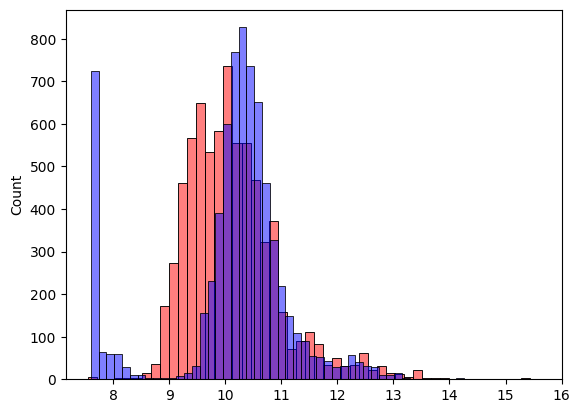

In [314]:
sns.histplot(y_pred, color = 'red' , alpha=0.5, bins=50)
sns.histplot(y_train, color = 'blue', alpha=0.5, bins=50)

## 2.8 RMSE

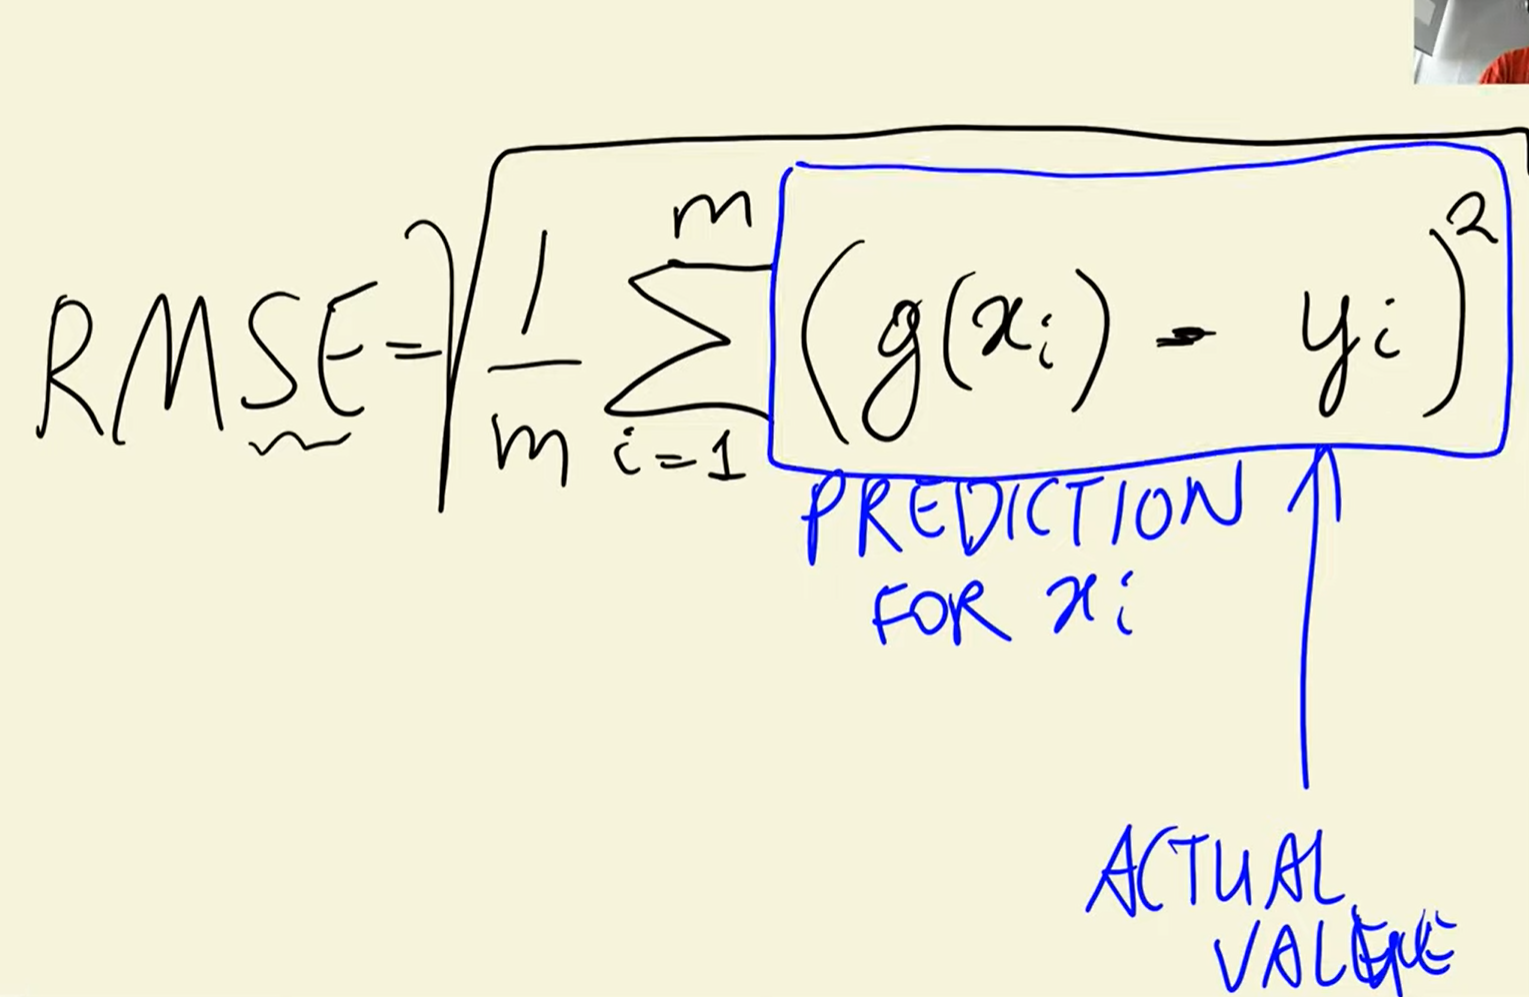

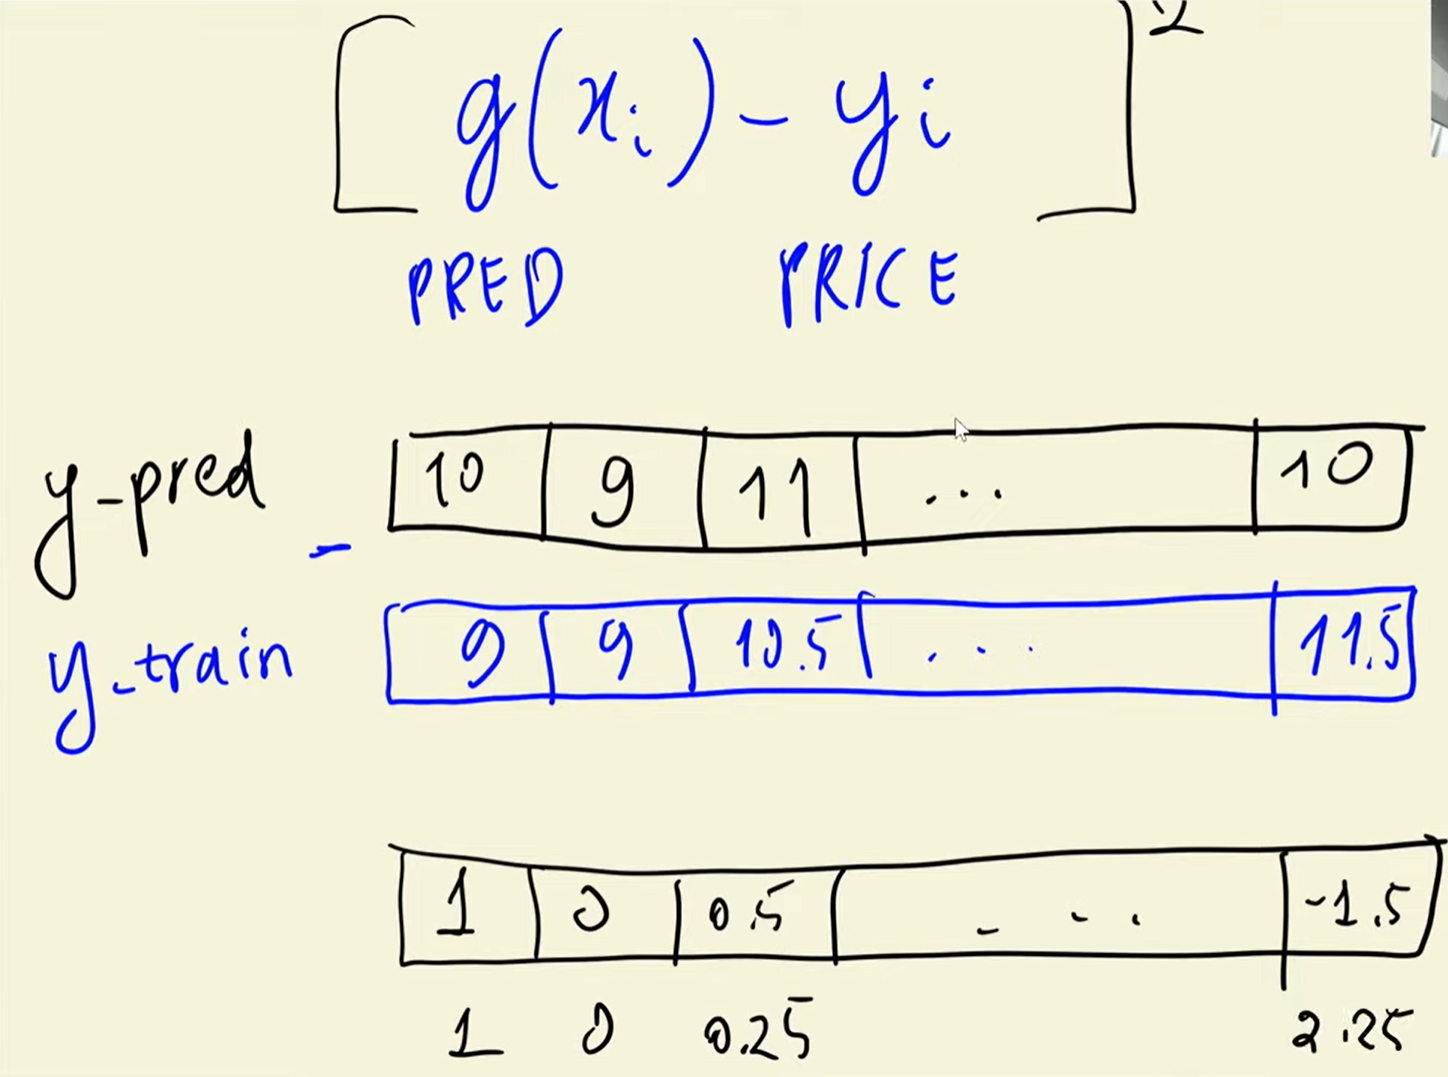

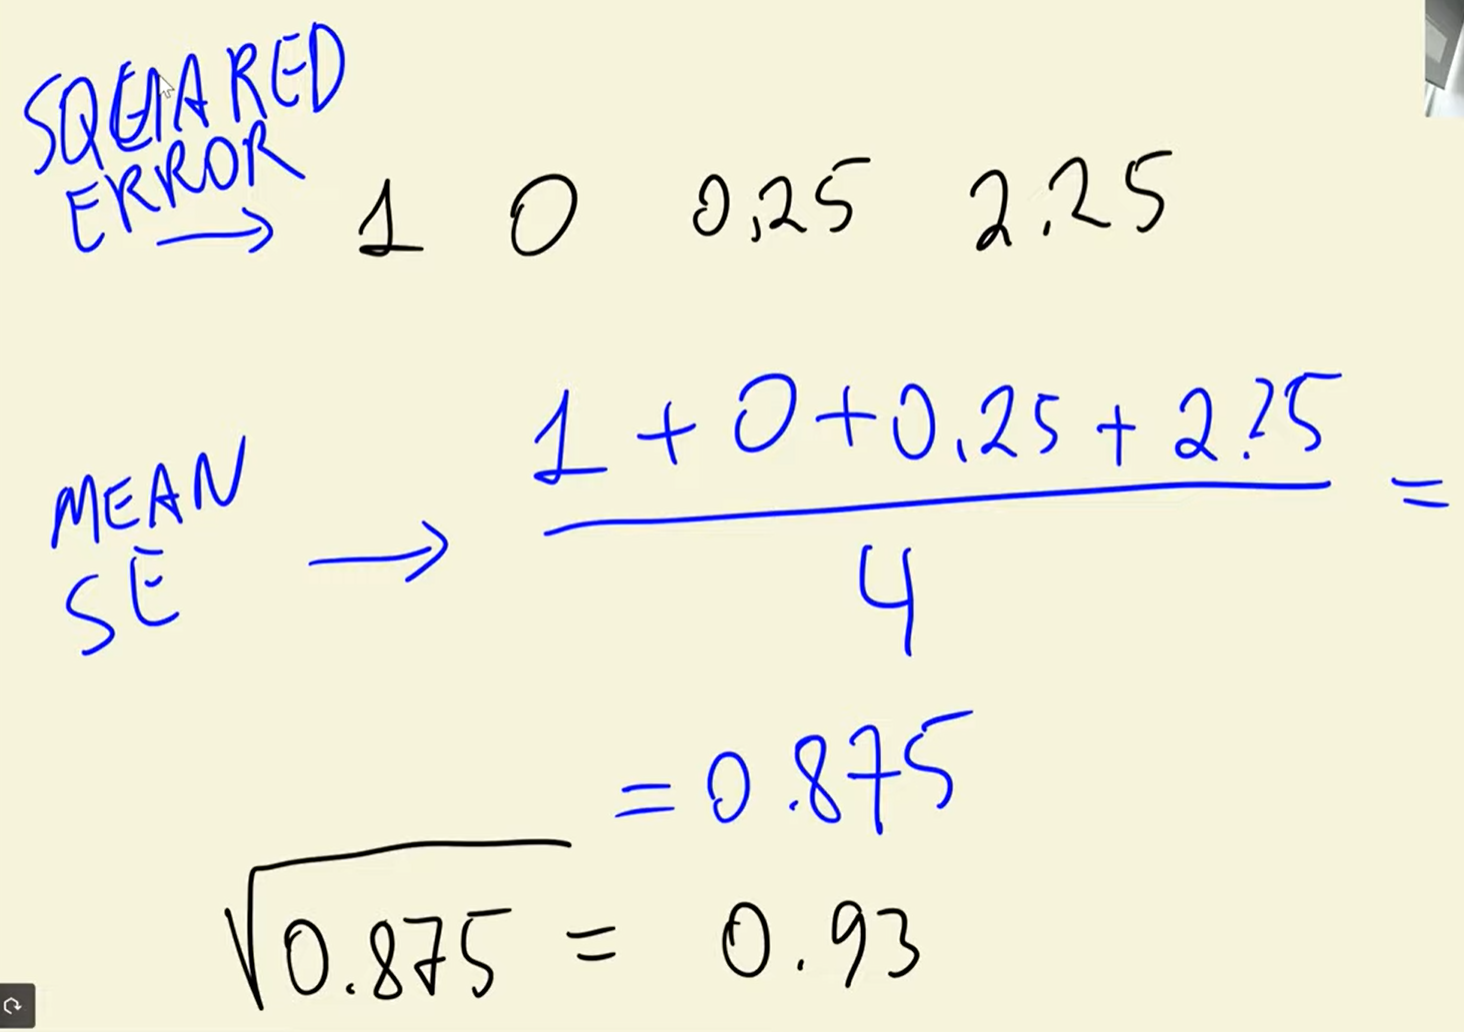

In [315]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [316]:
rmse(y_train, y_pred)

0.7494783449748382

## 2.9 Validating model

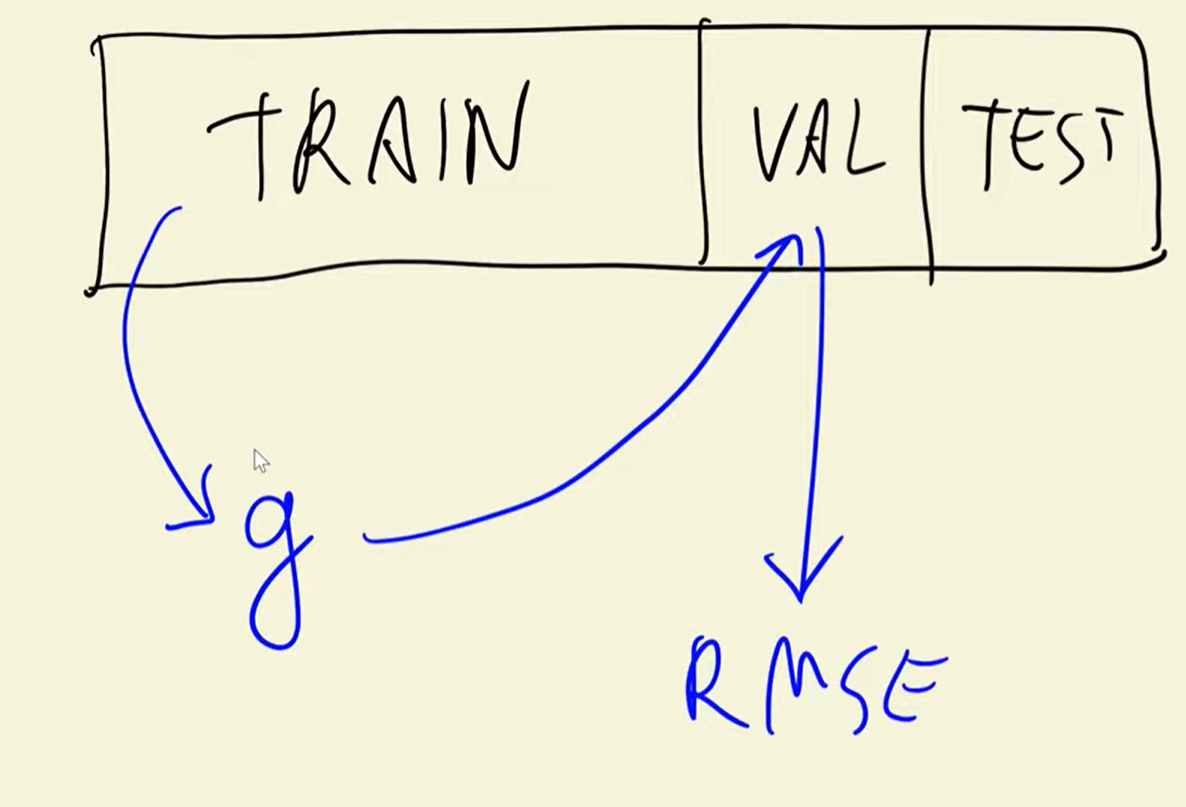

#### In previous section we found RMSE between y_pred and y_train, but actually we have to finde RMSE between y_pred and y_val, because y_val and df_val in general didn't take a part in our model learning, but y_train did, so to compatre with y_tain don't correct

In [317]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [318]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7580590021748533

## 2.10 Simple feature engineering

Feature Engineering it's important part of ML. Good feature engineering may significally improve precise your model. So basically this is the main goal of feature engineering. 

The main idea of this action is working (improving) some of your features and as the result helps your ML model better understand your data dependencies. 


For example we have year column in our dataset which shows year's of developing our car model. This is quite informative in usefull feature for our model. But we car redevelop in and let's say add new columns which will show us how old our cars. For that we can do someting like this - **df['age'] = 2023 - df.year**

In [319]:
df_train

make          model  year                engine_fuel_type  \
0        hyundai        elantra  2016                regular_unleaded   
1          mazda     mx-5_miata  2015  premium_unleaded_(recommended)   
2           audi             90  1995                regular_unleaded   
3        hyundai  elantra_coupe  2013                regular_unleaded   
4         suzuki          aerio  2005                regular_unleaded   
...          ...            ...   ...                             ...   
7145    infiniti              m  2012     premium_unleaded_(required)   
7146      subaru            brz  2017     premium_unleaded_(required)   
7147    cadillac            ats  2015        flex-fuel_(unleaded/e85)   
7148  volkswagen      jetta_gli  2013  premium_unleaded_(recommended)   
7149       honda      ridgeline  2014                regular_unleaded   

      engine_hp  engine_cylinders transmission_type      driven_wheels  \
0         173.0               4.0         automatic  front_wheel_drive   
1         167.0               4.0            manual   rear_wheel_drive   
2         172.0               6.0            manual    all_wheel_drive   
3         145.0               4.0         automatic  front_wheel_drive   
4         155.0               4.0         automatic  front_wheel_drive   
...         ...               ...               ...                ...   
7145      330.0               6.0         automatic    all_wheel_drive   
7146      205.0               4.0            manual   rear_wheel_drive   
7147      321.0               6.0         automatic   rear_wheel_drive   
7148      210.0               4.0            manual  front_wheel_drive   
7149      250.0               6.0         automatic   four_wheel_drive   

      number_of_doors                    market_category vehicle_size  \
0                 4.0                        performance      compact   
1                 2.0                        performance      compact   
2                 4.0                             luxury      compact   
3                 2.0                                NaN      compact   
4                 4.0                                NaN      compact   
...               ...                                ...          ...   
7145              4.0                 luxury,performance        large   
7146              2.0                        performance      compact   
7147              4.0  flex_fuel,luxury,high-performance      compact   
7148              4.0                        performance      midsize   
7149              4.0                                NaN        large   

        vehicle_style  highway_mpg  city_mpg  popularity  
0               sedan           35        24        1439  
1         convertible           28        22         586  
2               sedan           23        17        3105  
3               coupe           37        27        1439  
4               sedan           28        22         481  
...               ...          ...       ...         ...  
7145            sedan           24        17         190  
7146            coupe           29        21         640  
7147            sedan           28        18        1624  
7148            sedan           33        22         873  
7149  crew_cab_pickup           21        15        2202  

[7150 rows x 15 columns]

In [320]:
df_train.year.max()

2017

In [321]:
2017 - df_train.year

0        1
1        2
2       22
3        4
4       12
        ..
7145     5
7146     0
7147     2
7148     4
7149     3
Name: year, Length: 7150, dtype: int64

In [322]:
def prepare_X(df):
    df = df.copy()
    
    df['age'] = 2017 - df.year
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [323]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5034941452073713

#### We see big improvement in accuracy of our model. RMSE down from 0.75 to 0.5. This is result of feature engineering

<Axes: ylabel='Count'>

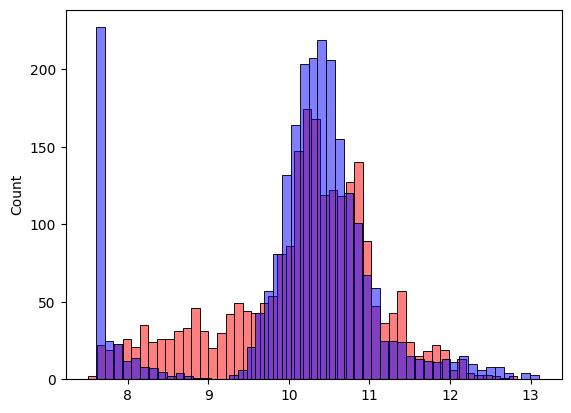

In [324]:
sns.histplot(y_pred, color = 'red' , alpha=0.5, bins=50)
sns.histplot(y_val, color = 'blue', alpha=0.5, bins=50)

## 2.11 Categorical variavles 

Categorical variables it's a string records which represent quality characteristics our subject. For example in our dataset we have several columns with categorical variables like **make, transmission_type, number_of_doors, etc**.

In [325]:
df.head()

make       model  year             engine_fuel_type  engine_hp  \
0  bmw  1_series_m  2011  premium_unleaded_(required)      335.0   
1  bmw    1_series  2011  premium_unleaded_(required)      300.0   
2  bmw    1_series  2011  premium_unleaded_(required)      300.0   
3  bmw    1_series  2011  premium_unleaded_(required)      230.0   
4  bmw    1_series  2011  premium_unleaded_(required)      230.0   

   engine_cylinders transmission_type     driven_wheels  number_of_doors  \
0               6.0            manual  rear_wheel_drive              2.0   
1               6.0            manual  rear_wheel_drive              2.0   
2               6.0            manual  rear_wheel_drive              2.0   
3               6.0            manual  rear_wheel_drive              2.0   
4               6.0            manual  rear_wheel_drive              2.0   

                         market_category vehicle_size vehicle_style  \
0  factory_tuner,luxury,high-performance      compact         coupe   
1                     luxury,performance      compact   convertible   
2                luxury,high-performance      compact         coupe   
3                     luxury,performance      compact         coupe   
4                                 luxury      compact   convertible   

   highway_mpg  city_mpg  popularity   msrp  
0           26        19        3916  46135  
1           28        19        3916  40650  
2           28        20        3916  36350  
3           28        18        3916  29450  
4           28        18        3916  34500

In [326]:
df.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
msrp                   int64
dtype: object

In [327]:
df.number_of_doors.unique()

array([ 2.,  4.,  3., nan])

Some of them, for example **number_of_doors** have not object type, but float64 type despite the fact that actually it's not a numerical variables, it's catecorical. 

**number_of_doors** column shows how many door in partical car and the options are: 2, 3, 4. So basically there are 3 categories: cars with 2 doors, with 3 doors and with 4 doors. In this situation we have to create 3 more columns 2_doors, 3_doors and 4_doors with booleans values

In [328]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [329]:
prepare_X(df_train)

array([[173.,   4.,  35., ...,   0.,   0.,   1.],
       [167.,   4.,  28., ...,   1.,   0.,   0.],
       [172.,   6.,  23., ...,   0.,   0.,   1.],
       ...,
       [321.,   6.,  28., ...,   0.,   0.,   1.],
       [210.,   4.,  33., ...,   0.,   0.,   1.],
       [250.,   6.,  21., ...,   0.,   0.,   1.]])

#### Let's see on RMSE. Does it improved? 

In [330]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.502591356111676

#### Previous result was - 0.5034941452073713. So we see a litle iprovement 

Let's look on the most popular car models

In [340]:
makes = list(df.make.value_counts().head().index)
makes

['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge']

#### We can change categorical feature "Make" to boolean like on previous step and let's see on RMSE after that

In [344]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    for v in makes:
        df['make_%s' % v] = (df.make == v).astype('int')
        features.append('make_%s' % v)
    
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

In [345]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4963479956945944

#### Our previous result was - 0.502591356111676. So again we see a little improvement.

So we transform 2 catecorical variables to numerical so far. But we can do the same with another catecorical variables as well.

In [347]:
df_train.dtypes

make                  object
model                 object
year                   int64
engine_fuel_type      object
engine_hp            float64
engine_cylinders     float64
transmission_type     object
driven_wheels         object
number_of_doors      float64
market_category       object
vehicle_size          object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
popularity             int64
dtype: object

In [359]:
categorical_var = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels',
    'market_category', 'vehicle_size', 'vehicle_style'
]

In [365]:
categories = {}

for c in categorical_var:
    categories[c] = list(df[c].value_counts().head().index)

In [366]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

#### What we did above? It's simple. We take our list of categorical var and then find top 5 position in this categories. Next we create dictionries with this records named categoires

#### Again use our prepare_X function one more time

In [367]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
    
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c,v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    
    return X

#### And one more time calculate our RMSE 

In [368]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

86.38700702811839

#### WOW! We get significally higher RMSE. Previous result was - 0.4963479956945944. 

We add some new features but something went wrong and our RMSE shows worse performance. Let's find out what happened.
